In [1]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

from spinnorse_tools import fetch_files, plot_in_v_out

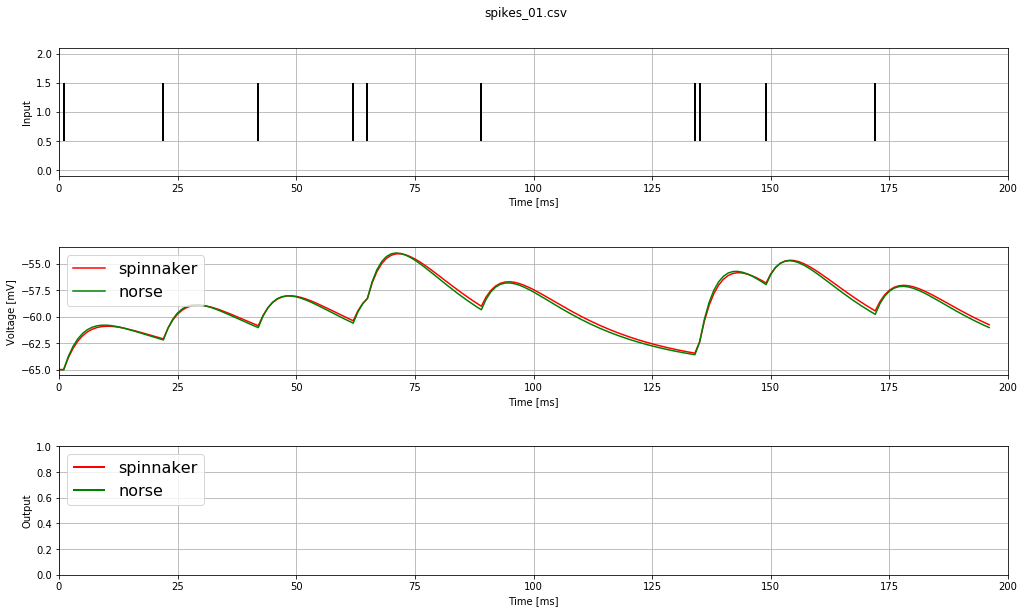

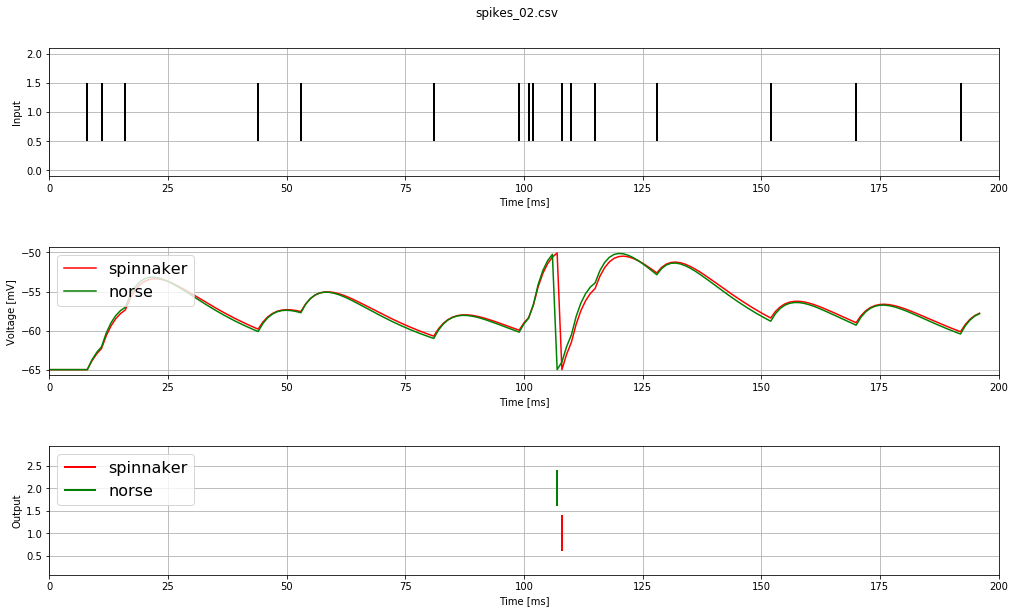

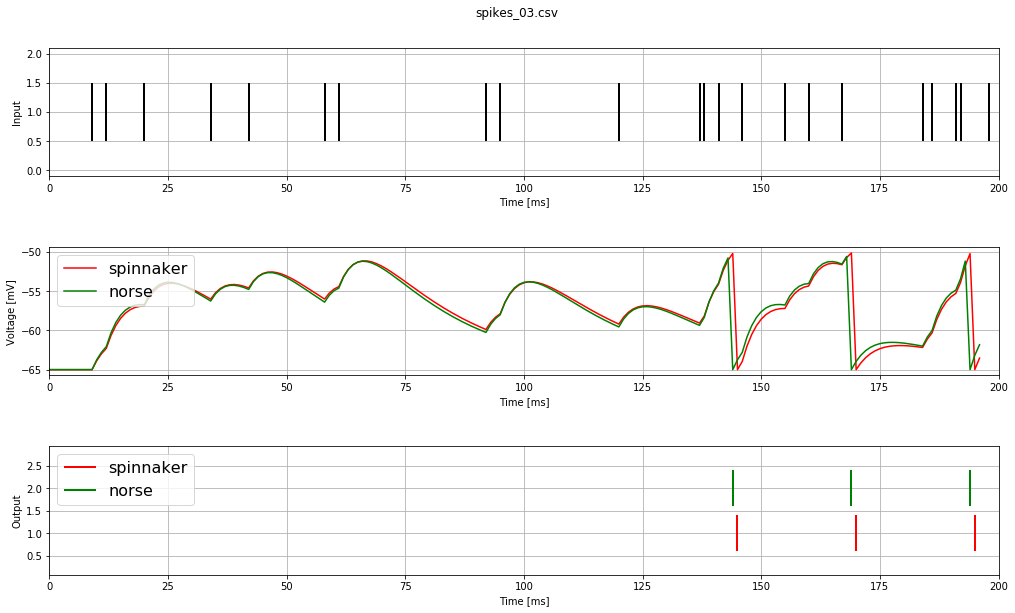

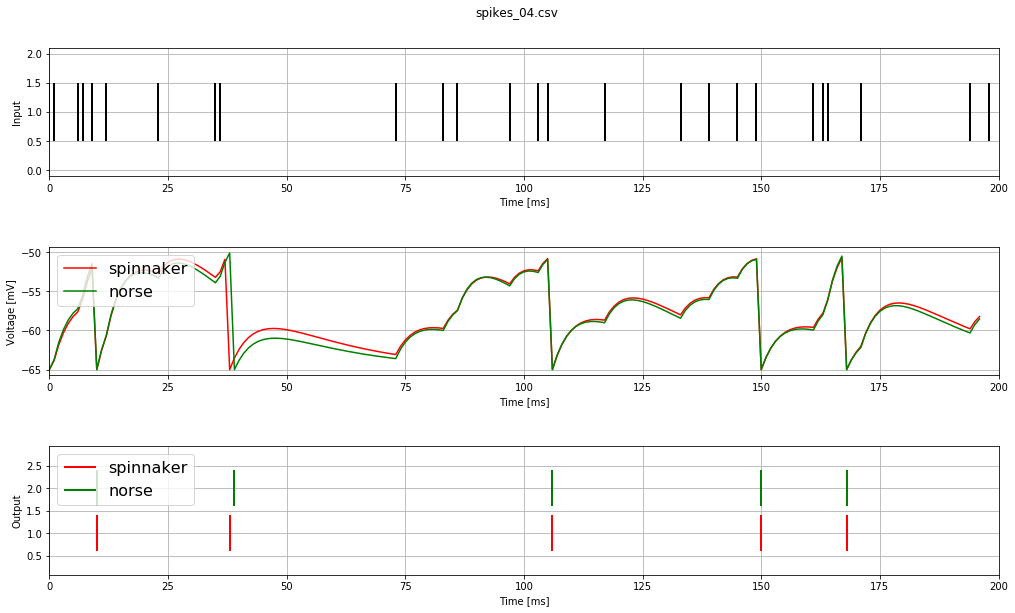

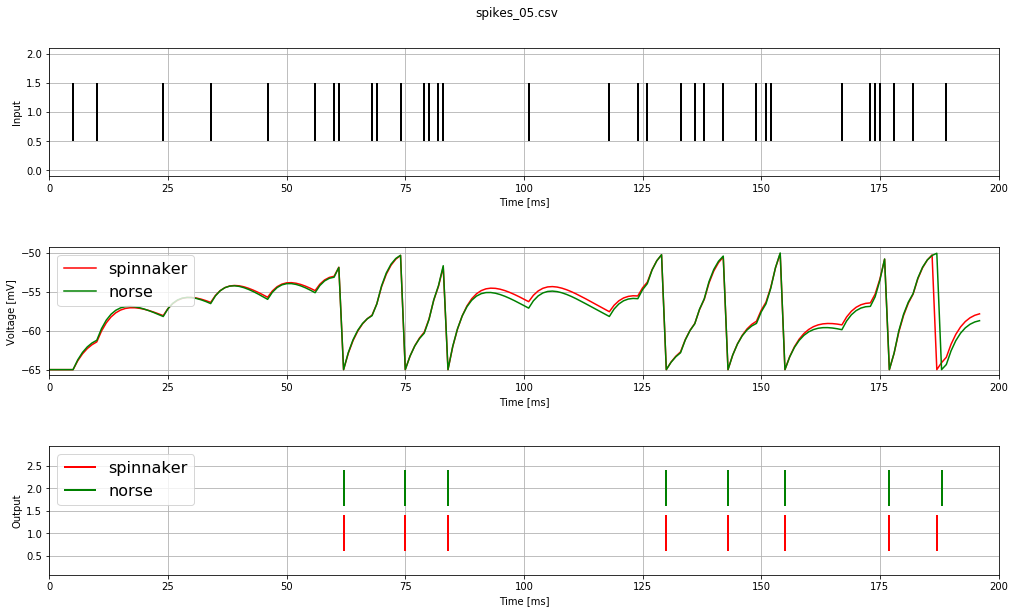

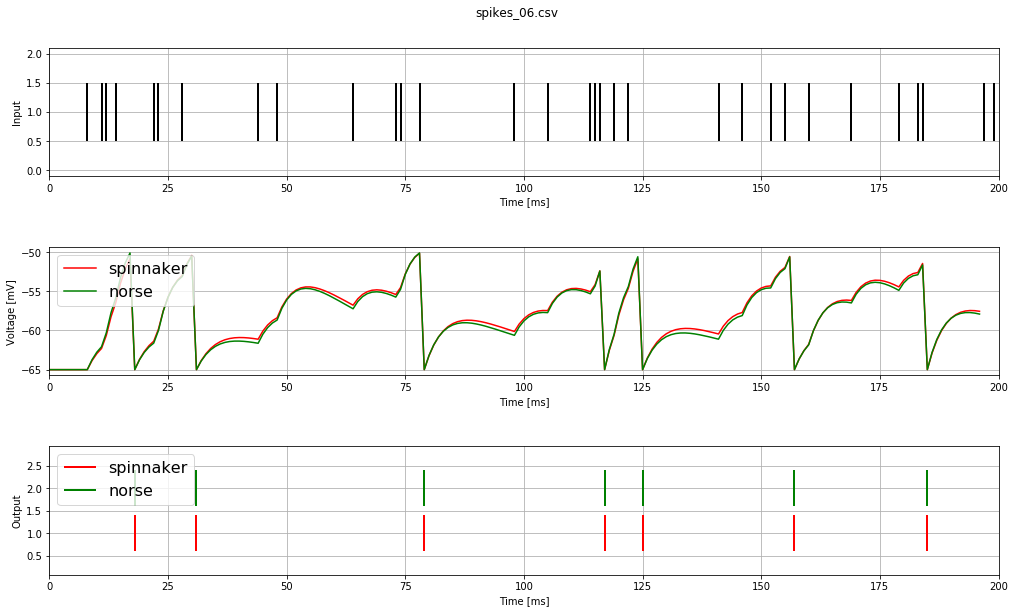

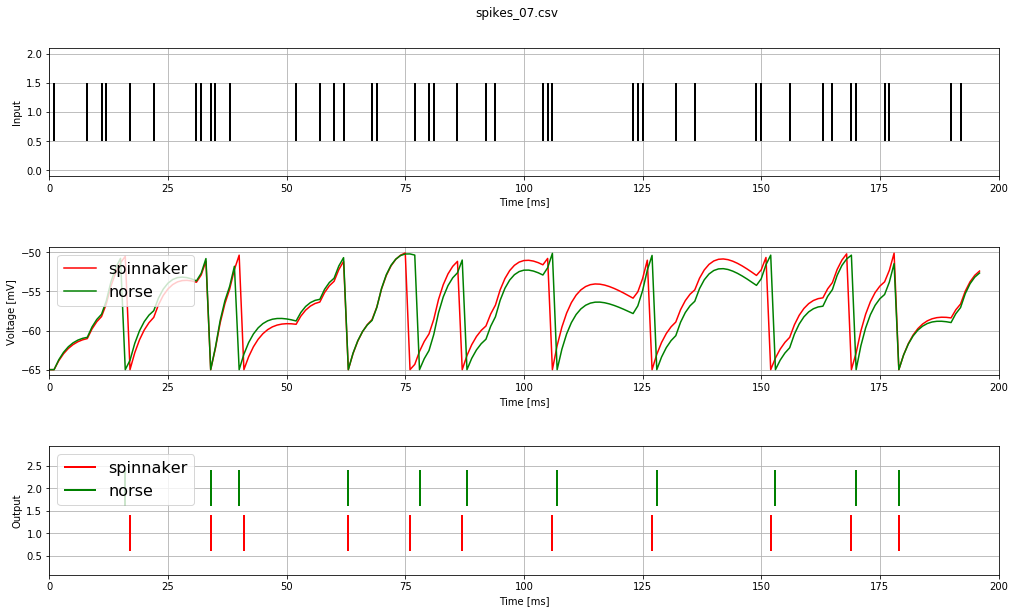

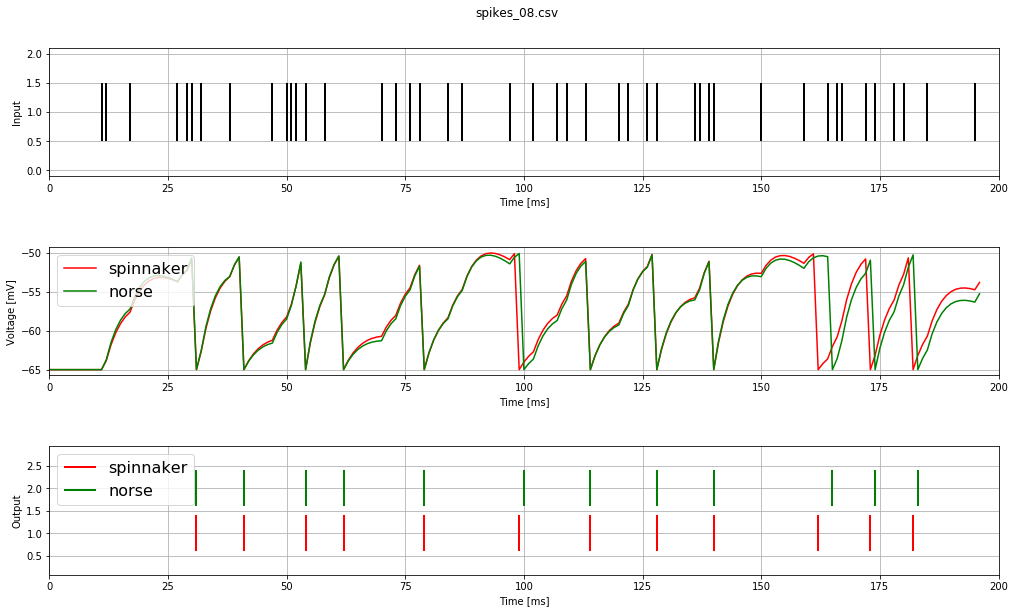

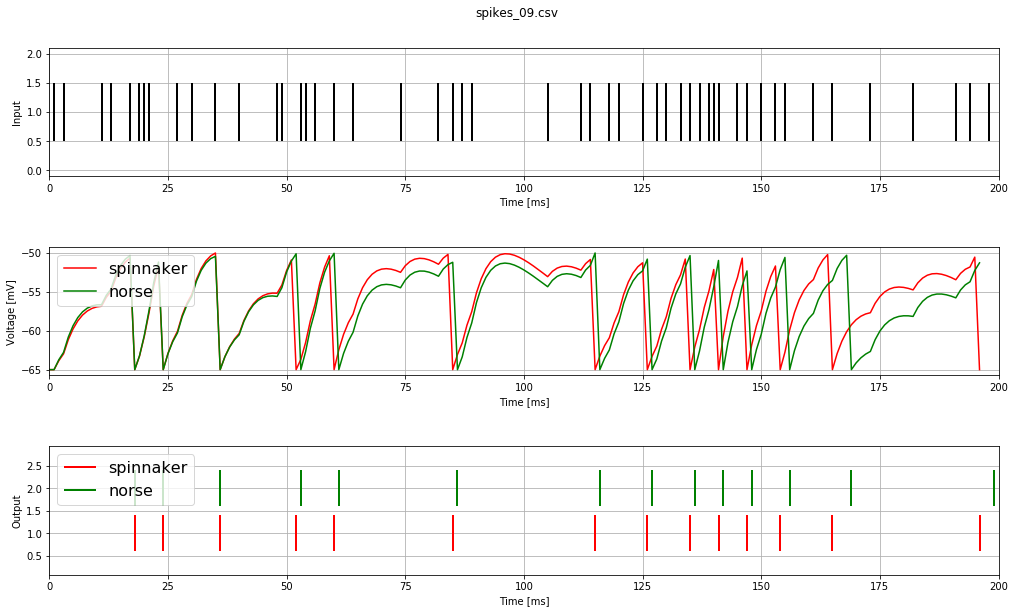

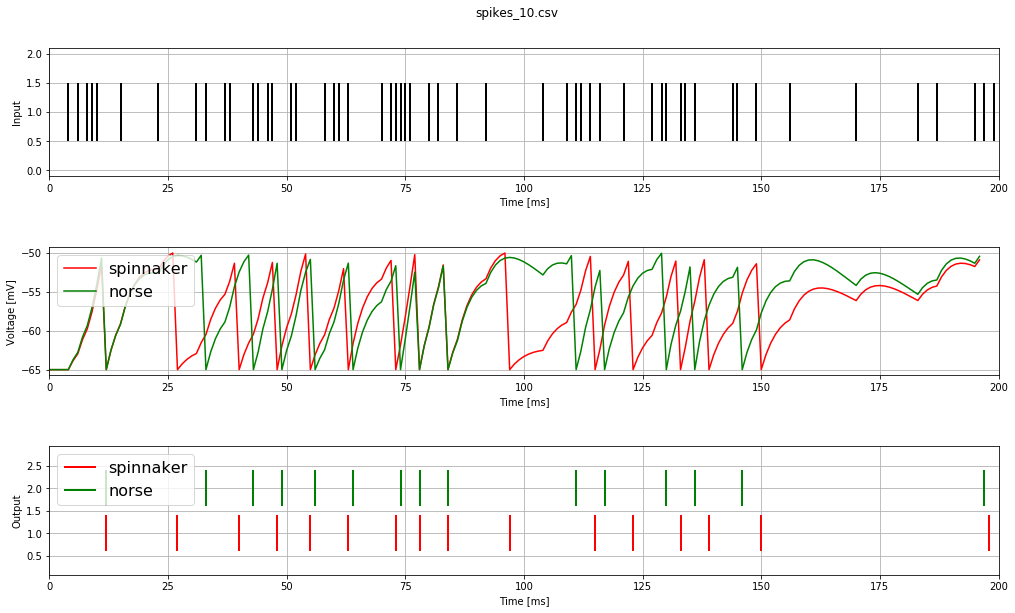

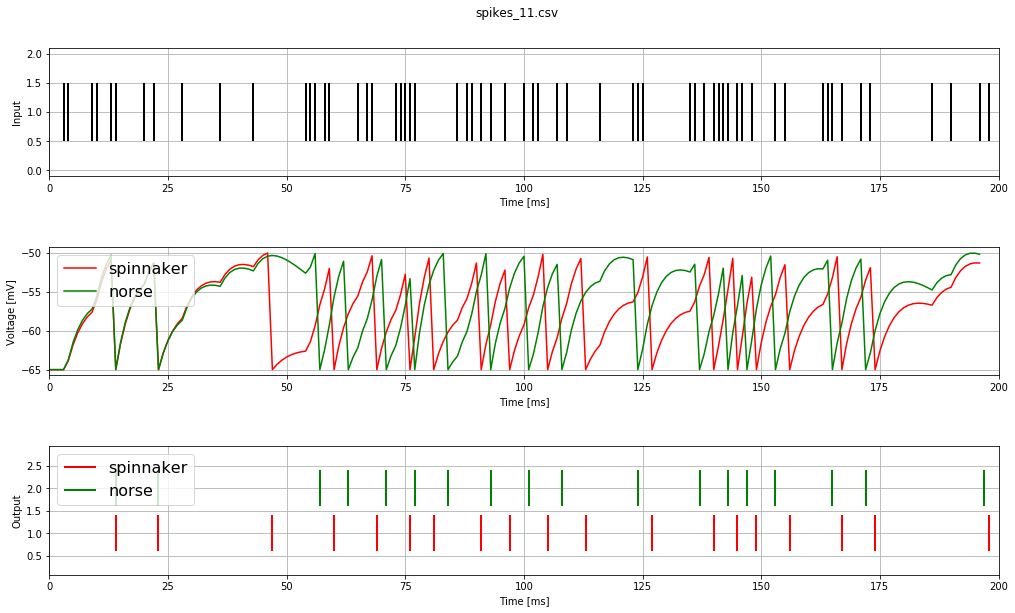

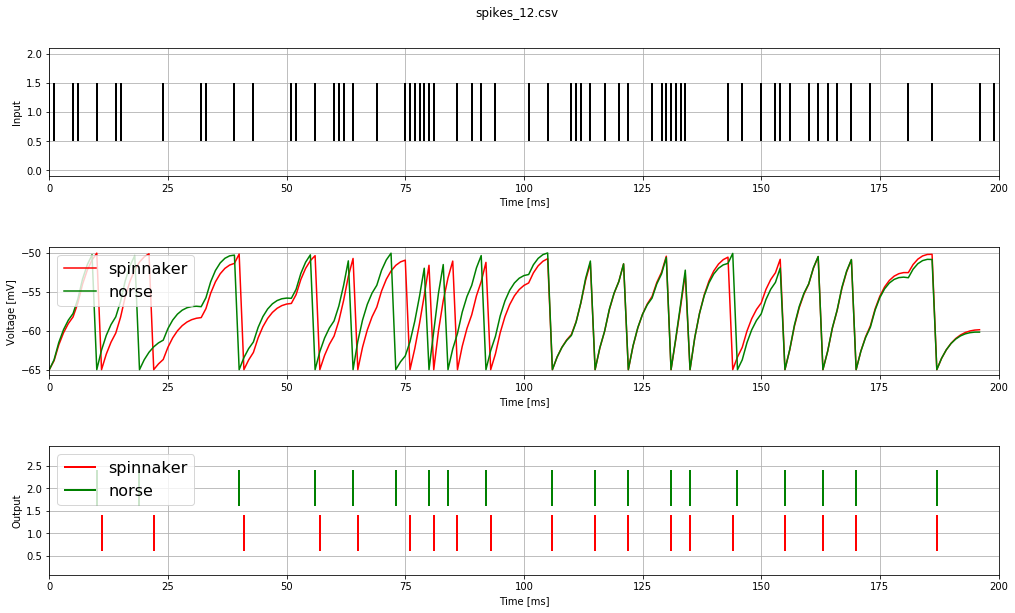

In [2]:
path = "summary/common/"
files = fetch_files(path) 

'''
Simulate for each input file + Plot + Save data
'''
n = len(files)
plot_flag = True
for i in range(n):
    
    
    # Get Input Spikes from file
    f_name = files[i]
    sfn = f_name.replace(path, "")
    
    i_spikes = np.where(genfromtxt("summary/common/" + sfn, delimiter=',')>0)
    
    try:
        v_spinnaker = genfromtxt("summary/spinnaker/" + "voltage_" + sfn, delimiter=',')
        o_spinnaker = np.where(genfromtxt("summary/spinnaker/" + "output_" + sfn, delimiter=',')>0)
    except:
        print("No SpiNNaker data for " + sfn)
        plot_flag = False
        
    try:
        o_norse = np.where(genfromtxt("summary/norse/" + "output_" + sfn, delimiter=',')>0)
        v_norse = genfromtxt("summary/norse/" + "voltage_" + sfn, delimiter=',')
    except:
        print("No Norse data for " + sfn)
        plot_flag = False

    if plot_flag:
        d = 2

        fig, axs = plt.subplots(3, figsize=(15,9))
        fig.tight_layout(pad=5.0)
        
        fig.suptitle(sfn)

        axs[0].eventplot(i_spikes, linewidths=2, colors='k')
        axs[0].set_xlim((0,len(v_spinnaker)))
        axs[0].set_xlabel("Time [ms]")
        axs[0].set_ylabel("Input")
        axs[0].grid()

        axs[1].plot(v_spinnaker[d:-1], label="spinnaker", color='r')
        axs[1].plot(v_norse[0:-(1+d)], label="norse", color='g')
        axs[1].set_xlim((0,len(v_spinnaker)))
        axs[1].set_xlabel("Time [ms]")
        axs[1].set_ylabel("Voltage [mV]")
        axs[1].grid()
        axs[1].legend(loc="upper left", fontsize=16)

        axs[2].eventplot(o_spinnaker-np.ones(len(o_spinnaker))*(d-1), linewidths=2, colors='r', lineoffsets=1, linelengths = 0.8, label="spinnaker")
        axs[2].eventplot(o_norse, linewidths=2, colors='g', lineoffsets=2, linelengths = 0.8,  label="norse")
        axs[2].set_xlim((0,len(v_spinnaker)))
        axs[2].set_xlabel("Time [ms]")
        axs[2].set_ylabel("Output")
        axs[2].grid()
        axs[2].legend(loc="upper left", fontsize=16)
        
        sfn = sfn.replace(".csv","")
        fig.savefig("summary/common/" + "Comparison_" + sfn + ".png")
